"""
Created on Fri Sep 16 17:52:25 2022
@author: fcosta
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

# __Analytical view of correlated and uncorrelated uncertainties.__
## Combined uncertainty in simple operations. Sum and substraction.
When two input quantities are correlated, this correlation must be taken into account when estimating the combined uncertainty. 

This exercise aims to evaluate the effect of the correlation between two input quantities on their combined uncertainty. The measurand of interest is the distance of a string. To obtain the input quantities, or distances, we make use of two rulers. The fact that these two rulers were probably calibrated according to similar standards and operations, and scaled with comparable accuracy might make these measurements correlated.   
We take N measurements with each ruler and obtain a mean value (L1_mean, L2_mean). The error in the measurement (U_ruler1, U_ruler2) is the standard deviation of the N measurements, and is associated with the shortest distance measurable by each ruler, with a coverage factor k.

### Input quantities 

In [2]:
# N° of points for the montecarlo simulation
N=100000

# Expected values of the measurand estimated using ruler1 and ruler2.
L1_mean = 5 # expected value L1 [m]
L2_mean = 1.9 # Expected value L2 [m]

### Rulers' uncertainties and correlation coefficient

In [3]:
U_ruler1 = .01  # uncertainty ruler1 [m] (stdv)
U_ruler2 = .03  # uncertainty ruler2 [m] (stdv)
L_corr_n = .96  # degree of correlation between L1 and L2: [-1,1] --> 0:uncorrelated; -1,1:fully negatively/positively correlated
k        = 3    # coverage factor 
n_dec    = 3    # N° of decimals in the results

### Random distributions

In [4]:
Distributions=pd.DataFrame({'L1':np.random.normal(L1_mean,U_ruler1,N),'L2':np.random.normal(L2_mean,U_ruler2,N)})

In [5]:
Distributions

,L1,L2
0,4.999323,1.977201
1,4.996913,1.925527
2,4.994577,1.896124
3,4.999121,1.931464
4,4.990295,1.910214
...,...,...
99995,5.004644,1.941347
99996,4.996102,1.936581
99997,5.003164,1.856515
99998,4.999960,1.885850


## Correlated distributions for L1 and L2

 We create the correlated data for L1 and L2

In [6]:
L_means = [Distributions['L1'].mean(), Distributions['L2'].mean()]  
L_stds  = [Distributions['L1'].std(), Distributions['L2'].std()]

# Covariance matrix
L_covs = [[L_stds[0]**2          , L_stds[0]*L_stds[1]*L_corr_n], 
          [L_stds[0]*L_stds[1]*L_corr_n,           L_stds[1]**2]]

# Correlated distributions of L1 and L2
L_corr = np.random.default_rng().multivariate_normal(L_means, L_covs, N).T 

# Correlated distributions based on the former covariances
Correlated_Distributions=pd.DataFrame({'L_corr1':L_corr[0], 'L_corr2':L_corr[1]})
Correlated_Distributions

,L_corr1,L_corr2
0,4.991051,1.869034
1,4.991400,1.885059
2,5.000286,1.904617
3,5.010386,1.936278
4,5.006778,1.927125
...,...,...
99995,4.993435,1.870841
99996,4.984223,1.853554
99997,4.986013,1.857087
99998,4.986909,1.845746


In [7]:
# Covariance (L1, L2) and correlation coefficients as defined in GUM:
L_covariance = (1/(N-1))*sum((L_corr[0]-L_means[0])*(L_corr[1]-L_means[1]))
C_L = L_covariance/(L_stds[0]*L_stds[1]) # Correlation coefficients

# Correlation coefficients    
C_L0=np.corrcoef(L_corr[0], L_corr[1])
C_L1=C_L0[0][1]
print('Correlation coeficient: ',  C_L0,';\n L_COVS: ',L_covs,';\n L_CORR: ',L_corr,';\n L_covariance: ',L_covariance)

Correlation coeficient:  [[1.         0.95991669]
 [0.95991669 1.        ]] ;
 L_COVS:  [[9.998283973174758e-05, 0.0002890104977052302], [0.0002890104977052302, 0.000906482245147611]] ;
 L_CORR:  [[4.99105051 4.99139959 5.000286   ... 4.98601318 4.98690943 4.99800207]
 [1.86903414 1.88505908 1.90461715 ... 1.85708666 1.84574636 1.89315798]] ;
 L_covariance:  0.00028796283601809737


## Montecarlo Uncertainty Method
### Sum and substraction of **uncorrelated** distributions
If we use different rulers to measure either string our operation will contain correlated terms when calculating the uncertainty that we need to account for.


In [8]:
L_sum_Uncorr   = Distributions['L1']+Distributions['L2']  # Sum of uncorrelated distributions
L_subs_Uncorr  = Distributions['L1']-Distributions['L2'] # Substraction of uncorrelated distributions

### Uncertainty uncorrelated quantities

In [9]:
U_Uncorr_sum_MC   = np.std(L_sum_Uncorr)     # Uncertainty of the sum of uncorrelated distributions
U_Uncorr_subs_MC = np.std(L_subs_Uncorr)   # Uncertainty of the substraction of uncorrelated distributions 

### Sum and substraction of **correlated** distributions

In [10]:
L_sum_Corr     = Correlated_Distributions['L_corr1']+Correlated_Distributions['L_corr2']  # Sum of correlated distributions
L_subs_Corr    = Correlated_Distributions['L_corr1']-Correlated_Distributions['L_corr2']  # Substraction of correlated distributions

### Uncertainty correlated quantities

In [11]:
U_Corr_sum_MC   = np.std(L_sum_Corr)    # Uncertainty of the sum of correlated distributions
U_Corr_subs_MC  = np.std(L_subs_Corr)   # Uncertainty of the substraction of correlated distributions

# GUM uncertainty method

In [12]:
### Uncertainties in summ and substraction of **uncorrelated** distributions

In [13]:
U_Uncorr_sum_GUM = np.sqrt(U_ruler1**2+U_ruler2**2) # Uncorrelated quantities
U_Uncorr_subs_GUM = np.sqrt(U_ruler1**2+U_ruler2**2)

In [14]:
### Summ and substraction of **correlated** distributions

In [15]:
U_Corr_sum_GUM   = np.sqrt(U_ruler1**2+U_ruler2**2+2*U_ruler1*U_ruler2*C_L)# Correlated quantities
U_Corr_subs_GUM   = np.sqrt(np.abs(U_ruler1**2+U_ruler2**2-2*U_ruler1*U_ruler2*C_L))

In [16]:
#### Relative uncertainties correlated quantities:
Urel_sum_GUM = 100*(U_Corr_sum_GUM)/(L1_mean+L2_mean)
Urel_sum_MC = 100*(U_Corr_sum_MC)/(L_sum_Corr.mean())

Urel_subs_GUM = 100*(U_Corr_subs_GUM)/abs(L1_mean-L2_mean)
Urel_subs_MC = 100*(U_Corr_subs_MC)/abs(L_subs_Corr.mean())

    
## Store results:

In [17]:
Uncertainties=pd.DataFrame({'Uncorrelated': {'SUM': {'GUM': U_Uncorr_sum_GUM, 'MC': U_Uncorr_sum_MC}, 'Substraction': {'GUM': U_Uncorr_subs_GUM, 'MC': U_Uncorr_subs_MC}}, 
                 'Correlated':{'SUM': {'GUM': U_Corr_sum_GUM,   'MC': U_Corr_sum_MC},   'Substraction': {'GUM': U_Corr_subs_GUM,   'MC': U_Corr_subs_MC}}})

# Results:
    

## Uncorrelated uncertainties:

In [18]:
print('Uncertainty of the uncorrelated sum (GUM):          ', k*round(Uncertainties['Uncorrelated']['SUM']['GUM'],n_dec) ,'m')
print('Uncertainty of the uncorrelated sum (MC):           ', k*round(Uncertainties['Uncorrelated']['SUM']['MC'],n_dec) ,'m')
print('Uncertainty of the uncorrelated substraction (GUM): ', k*round(Uncertainties['Uncorrelated']['Substraction']['GUM'],n_dec) ,'m')
print('Uncertainty of the uncorrelated substraction (MC):  ', k*round(Uncertainties['Uncorrelated']['Substraction']['MC'],n_dec) ,'m')


Uncertainty of the uncorrelated sum (GUM):           0.096 m
Uncertainty of the uncorrelated sum (MC):            0.096 m
Uncertainty of the uncorrelated substraction (GUM):  0.096 m
Uncertainty of the uncorrelated substraction (MC):   0.096 m


## Correlated uncertainties

In [19]:
print('Uncertainty of the correlated sum (GUM):                     ', k*round(Uncertainties['Correlated']['SUM']['GUM'],n_dec) ,'m')
print('Relative uncertainty of the correlated sum (GUM):            ', k*round(Urel_sum_GUM,n_dec) ,'%')

print('Uncertainty of the correlated sum (MC):                      ', k*round(Uncertainties['Correlated']['SUM']['MC'],n_dec) ,'m')
print('Relative uncertainty of the correlated sum (MC):             ',k* round(Urel_sum_MC,n_dec) ,'%')

print('Uncertainty of the correlated substraction (GUM):            ', k*round(Uncertainties['Correlated']['Substraction']['GUM'],n_dec) ,'m')
print('Relative uncertainty of the correlated substraction (GUM):   ', k*round(Urel_subs_GUM,n_dec) ,'%')

print('Uncertainty of the correlated substraction (MC):             ', k*round(Uncertainties['Correlated']['Substraction']['MC'],n_dec) ,'m')
print('Relative uncertainty of the correlated substraction (MC):    ', k*round(Urel_subs_MC,n_dec) ,'%')


Uncertainty of the correlated sum (GUM):                      0.12 m
Relative uncertainty of the correlated sum (GUM):             1.7249999999999999 %
Uncertainty of the correlated sum (MC):                       0.12 m
Relative uncertainty of the correlated sum (MC):              1.7279999999999998 %
Uncertainty of the correlated substraction (GUM):             0.063 m
Relative uncertainty of the correlated substraction (GUM):    1.9980000000000002 %
Uncertainty of the correlated substraction (MC):              0.063 m
Relative uncertainty of the correlated substraction (MC):     2.0010000000000003 %


## Plot results

Text(0.5, 1.0, 'Correlated series for L -- C=0.96')

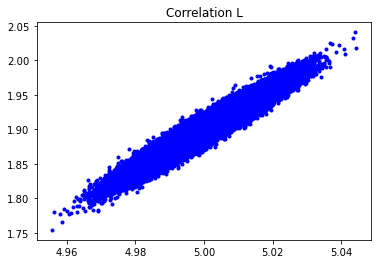

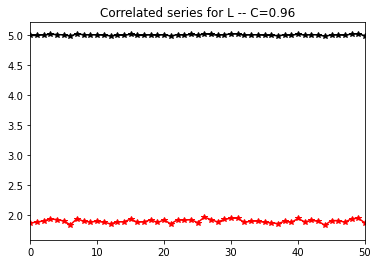

In [21]:
fig0,ax0=plt.subplots()
ax0.scatter(L_corr[0], L_corr[1],c='b',marker='.')
ax0.set_title('Correlation L')

fig1,ax1=plt.subplots()
ax1.set_xlim(0,50)
ax1.plot(L_corr[0],'-k', L_corr[1],'-r',marker='*')
ax1.set_title('Correlated series for L -- C=' + str(L_corr_n))


In [22]:
ddc={}

ddc['Frist']=77

In [23]:
ddc

{'Frist': 77}